<font color="blue" size=5><b>Probability Distribution Function- 2</b></font>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import normal

<font color="red" size=3><b>Paramtric Density Estimation</b></font>

In [2]:
# creation of normal data
sample = normal(loc=50, scale=5, size=1000)

(array([ 10.,  40., 121., 197., 261., 198., 119.,  40.,  12.,   2.]),
 array([35.46995905, 38.68017771, 41.89039638, 45.10061504, 48.3108337 ,
        51.52105236, 54.73127102, 57.94148968, 61.15170834, 64.361927  ,
        67.57214566]),
 <BarContainer object of 10 artists>)

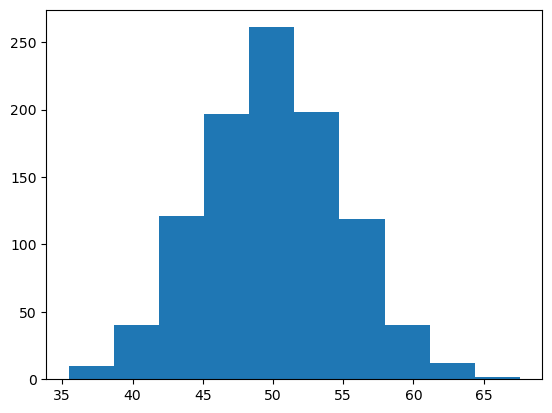

In [4]:
# plot histogram to understand data
plt.hist(sample)

In [5]:
# calculate sample mean and sample std deviation
sample_mean = sample.mean()
sample_std = sample.std()

In [6]:
# fit the distribution with the above parameter
from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [7]:
values = np.linspace(sample.min(), sample.max(), 100)

In [8]:
probability_density = [dist.pdf(value) for value in values]

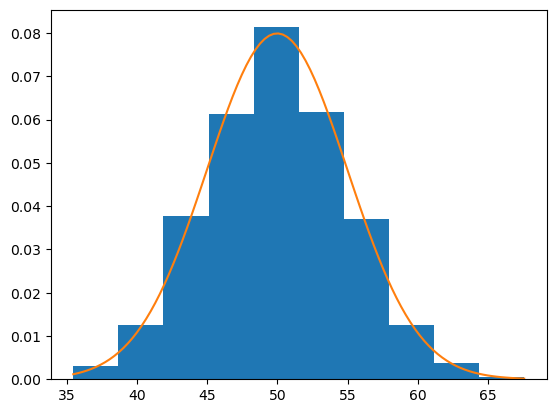

In [9]:
# plot the histogram and pdf (using matplotlib)
plt.hist(sample, bins=10, density=True)
plt.plot(values, probability_density)

C:\Users\Paulami Maitra\AppData\Local\Temp\ipykernel_26888\2444666240.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)
C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

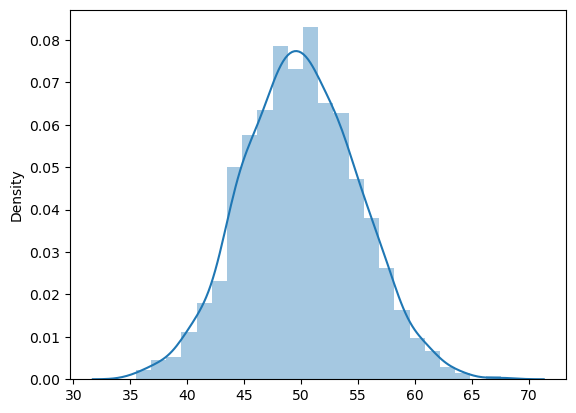

In [10]:
# using seaborn
sns.distplot(sample)

<font color="red" size=3><b>Non-parametric Density Estimation</b></font>

<font color="red" size=3><b>Kernel Density Estimator (KDE)</b></font>

In [11]:
# generate sample
sample1 = normal(loc=20, scale=5,size=300)
sample2 = normal(loc=40, scale=5,size=700)
sample= np.hstack((sample1, sample2))

C:\Users\Paulami Maitra\AppData\Local\Temp\ipykernel_26888\1950040031.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample)
C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

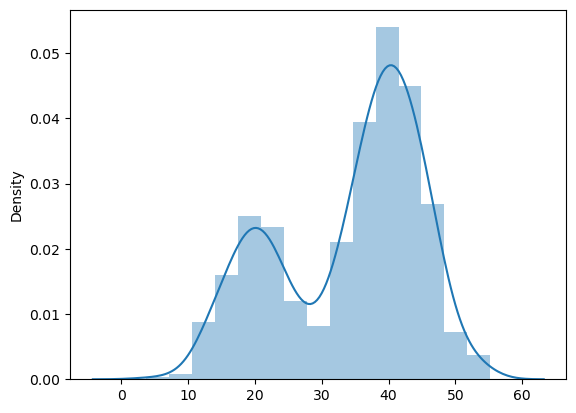

In [12]:
sns.distplot(sample)

In [19]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(bandwidth=3, kernel='gaussian') # the higher the bandwidth the smoother the graph

# convert data into 2D array as ML algo doesn't accept 1D array
sample = sample.reshape(len(sample), 1)
model.fit(sample)

KernelDensity(bandwidth=3)

<font color="red" size=3><b>Cumulative Distribution Function (cmf) of PDF</b></font>

C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Paulami Maitra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


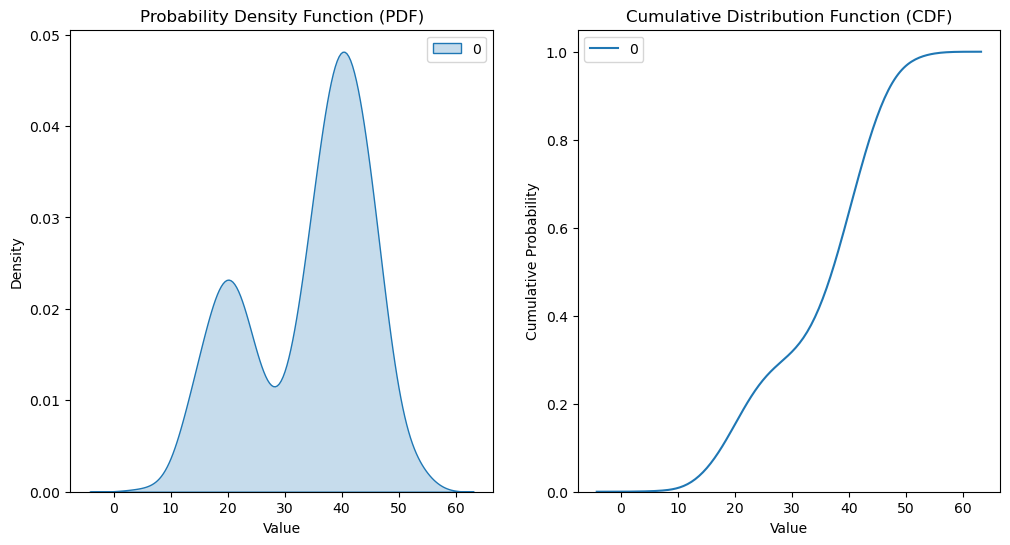

In [25]:
# plot PDF using Seaborn
plt.figure(figsize=(12, 6))

# plot PDF
plt.subplot(1, 2, 1)
sns.kdeplot(sample, bw_adjust=1, fill=True)
plt.title('Probability Density Function (PDF)')
plt.xlabel('Value')
plt.ylabel('Density')

# plot CDF
plt.subplot(1, 2, 2)
sns.kdeplot(sample, bw_adjust=1, cumulative=True)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')

plt.show()